In [17]:
from cnd.ocr.predictor import Predictor
import pathlib
import numpy as np
import cv2
from matplotlib import pyplot as plt
from cnd.ocr.transforms import get_transforms

model_path = './models/best_model.pth'
img_size = [32,96]

p = Predictor(model_path, img_size)
transforms = get_transforms(img_size)

In [15]:
path = './CropNumbers/'
dataset_paths = pathlib.Path(path) 

filepaths = list(dataset_paths.glob('**/*'))[4:]
filepaths = [file for file in filepaths if file.is_file()]
print(len(filepaths))
filepaths[:3]

4198


[PosixPath('CropNumbers/NumBase/A238XH 199.bmp'),
 PosixPath('CropNumbers/NumBase/T929PT 197.bmp'),
 PosixPath('CropNumbers/NumBase/H180PT 1740.bmp')]

CropNumbers/NumBase/P195MA 777.bmp


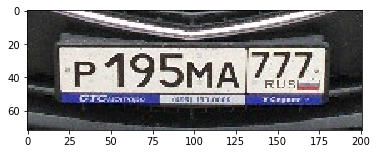

In [32]:
random_ind = np.random.randint(0,len(filepaths))
pic = cv2.imread(str(filepaths[random_ind]))
print(filepaths[random_ind])
plt.imshow(pic)

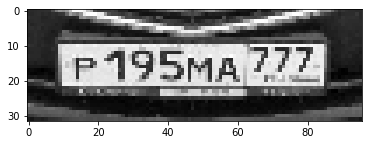

In [33]:
transformed = transforms(pic)[None, :,:,:]
plt.imshow(transformed[0][0], cmap='gray')

In [35]:
p.predict(transformed)

'P195MA777'